In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
## download jason file from profiled account create new api token and upload it
## this command import dataset from keggle to google colab
!kaggle datasets download -d salader/dogs-vs-cats ## copied from 3dots(near download) Copy API command

In [ ]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators : divied large dataset into batches
# name of generator we use here is image_dataset_from_directory

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 115ms/step - loss: 1.3422 - accuracy: 0.5699 - val_loss: 0.6518 - val_accuracy: 0.6196
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5789 - accuracy: 0.6968 - val_loss: 0.5887 - val_accuracy: 0.6850
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5021 - accuracy: 0.7557 - val_loss: 0.6566 - val_accuracy: 0.6346
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4591 - accuracy: 0.7875 - val_loss: 0.5018 - val_accuracy: 0.7574
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3904 - accuracy: 0.8262 - val_loss: 0.4443 - val_accuracy: 0.7910
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3153 - accuracy: 0.8636 - val_loss: 0.5189 - val_accuracy: 0.7788
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2470 - accuracy: 0.8989 - val_loss: 0.5277 - val_ac

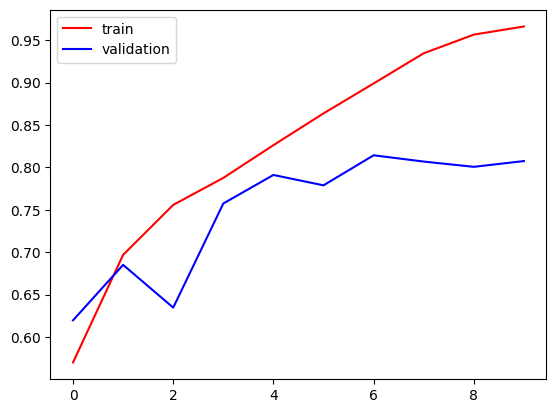

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

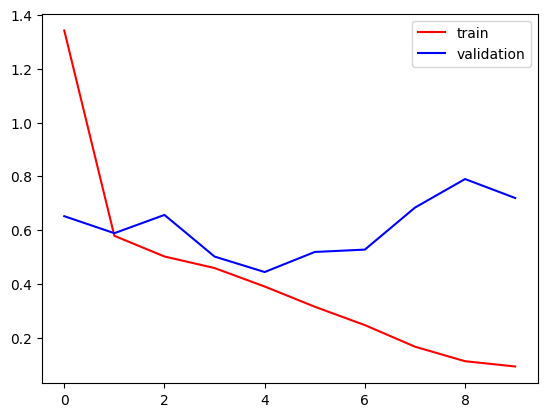

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.PNG')

TypeError: ignored

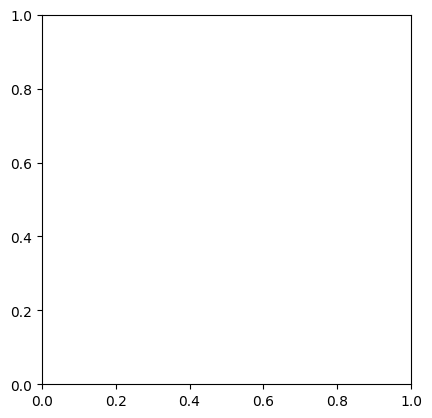

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)